# Homework 7

### (a) Consider the following linear program:

\begin{align} \\
&\text{min} & -2x_1 - 3x_2 \\
&\text{s.t.} & x_1 + x_2 \le 35 \\ 
&& 3x_1 + 2x_2 \le 100 \\
&& 2x_1 + 4x_2 \le 120 \\
&& x_1, x_2 \ge 0 \\
\end{align}

Below we plot the constraints of this linear program.

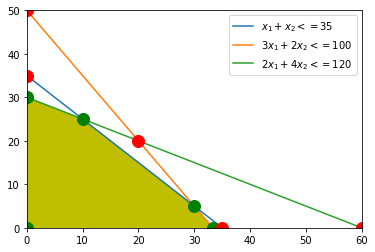

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# x1-values for our plot
xmax = 60
ymax = 50
x1 = np.arange(0, xmax, 0.1)

# the constraints to plot
c1 = -x1 + 35.
c2 = -3./2.*x1 + 100. / 2.
c3 = -2./4.*x1 + 120. / 4.

# plot the constraints
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.plot(x1, c1, x1, c2, x1, c3, label='Feasible Region')
plt.legend([r'$x_1 + x_2 <= 35$', r'$3x_1 + 2x_2 <= 100$', r'$2x_1 + 4x_2 <= 120$']);

# fill in the feasable region (using a polygon)
xp = [0, 0, 10, 30, 100./3.]
yp = [0, 30, 25, 5, 0]
plt.fill(xp ,yp, color='y');

#plot basic solutions (green = feasible, red = not-feasible)
plt.plot(xp, yp, 'or', markersize=12, color='green');
plt.plot([0,0,20,35,60], [35,50,20,0,0], 'or', markersize=12, color='red');

### (b) Transform it into a standard form LP.
The objective is already a minimization, so the objective function does not need to be transformed. Each of the 3 constraints are of the same type of inqequality, therefore we just need to add a slack variable for each $(x_3, x_4, x_5)$ constant and change the inequality to an equals.

\begin{align}
&\text{min} & -2x_1 - 3x_2 \\
&\text{s.t.} & x_1 + x_2 + x_3 = 35 \\ 
&& 3x_1 + 2x_2 + x_4 = 100 \\
&& 2x_1 + 4x_2 + x_5 = 120 \\
&& x_1, x_2, x_3, x_4, x_5 \ge 0 \\ 
\end{align}

In matrix format this yields the following.

$x = \begin{bmatrix} x_1 & x_2 & x_3 & x_4 & x_5 \end{bmatrix}^{T} \\ 
c = \begin{bmatrix} -2 & −3 & 0 & 0 & 0 \end{bmatrix}^{T} \\
A = \begin{bmatrix} 1 & 1 & 1 & 0 & 0 \\ 3 & 2 & 0 & 1 & 0 \\ 2 & 4 & 0 & 0 & 1 \end{bmatrix} \\
b = \begin{bmatrix} 35 & 100 & 120 \end{bmatrix}^{T}$

### (c) Use the procedure discussed in lecture to find *all* basic solutions.
We have 3 constraints therefore we need to pick  3 columns to determine a solution.  To find all basic solutions we need $C(5,3) = 10$. This is too many iterations to perform by hand, so we'll use python to iterate over the column combinations.

In [6]:
import itertools as it
import numpy as np
from scipy import linalg

c = np.array([-2., -3., 0., 0., 0.])
A = np.array([[1., 1., 1., 0., 0.],[3., 2., 0., 1., 0.],[2., 4., 0., 0., 1.]])
b = np.array([35., 100., 120.]).T

#obtain column combinations
n = range(5)
idx = [list(i) for i in it.combinations(n, 3)]
print('column combo count:', len(idx))
print('column combo sample:', idx[:3])
print('')
#iterate over each column combo and check solution
for i in idx:
    B = A[:, i]
    BI = linalg.inv(B)
    xb = BI.dot(b)
    print('xb =', ['x{}'.format(ii+1) for ii in i], '=', xb)
    print('xn =', ['x{}'.format(ii+1) for ii in n if ii not in i], '=', '[0, 0]')
    print('feasible:', all(xb > 0))
    #x = np.array([99 if ii in i else 0. for ii in i])
    x = np.zeros(5)
    for ii in range(3):
        x[i[ii]] = xb[ii]
    cost = c.dot(x)
    print('cost =', round(cost,2))
    print('-'*100)

column combo count: 10
column combo sample: [[0, 1, 2], [0, 1, 3], [0, 1, 4]]

xb = ['x1', 'x2', 'x3'] = [20. 20. -5.]
xn = ['x4', 'x5'] = [0, 0]
feasible: False
cost = -100.0
----------------------------------------------------------------------------------------------------
xb = ['x1', 'x2', 'x4'] = [10. 25. 20.]
xn = ['x3', 'x5'] = [0, 0]
feasible: True
cost = -95.0
----------------------------------------------------------------------------------------------------
xb = ['x1', 'x2', 'x5'] = [30.  5. 40.]
xn = ['x3', 'x4'] = [0, 0]
feasible: True
cost = -75.0
----------------------------------------------------------------------------------------------------
xb = ['x1', 'x3', 'x4'] = [ 60. -25. -80.]
xn = ['x2', 'x5'] = [0, 0]
feasible: False
cost = -120.0
----------------------------------------------------------------------------------------------------
xb = ['x1', 'x3', 'x5'] = [33.33333333  1.66666667 53.33333333]
xn = ['x2', 'x4'] = [0, 0]
feasible: True
cost = -66.67
----------

### (d)  Among all the basic solutions you found, which basic solutions are feasible, thus are basic feasible solutions? 
Feasible solutions are annototed in the output above with "feasible: True".  5 of the 10 solutions are marked feasible. This corresponds to the 5 corners of the feasible region shown in part (a).

### Which basic solution are infeasible? 
5 of the 10 solutions are marked as not-feasible.  These 5 solutions represent the intersection of constraints outside of the feasible region shown in part (a).

### Locate each basic solution on the graph you draw in part (a)
Feasible and not-feasible solutions are shown in the graph in part (a). Feasible solutions are shown in green. Not-feasible solutions are shown in red.

The optimal solution appears to be -95 $(x_1, x_2) = (10,25)$.

For fun, we can also solve the original (non-standard) LP with cvxpy.

In [5]:
import cvxpy as cp
import numpy as np

#setup variables and coeffcients
x = cp.Variable(2, 1)
c = np.array([-2., -3.])
A = np.array([[1.,1.],[3.,2.],[2.,4.]])
b = np.array([35., 100., 120.])

#setup objective and constraints
objective = cp.Minimize(c*x)
constraints = [A*x <= b, x >= 0.]

# solve
prob = cp.Problem(objective, constraints)
result = prob.solve()

# display optimal value of variables
print('The solution status is', prob.status)
print('The optimal value is ', round(result))
print('The optimal [x1, x2] is ', [round(xx,2) for xx in x.value])

The solution status is optimal
The optimal value is  -95.0
The optimal [x1, x2] is  [10.0, 25.0]
